# Randomized Optimization Assignment #2
---

## Requirements:
- Give a thorough analysis of your findings
- Program in any language desired (Python in this case)
- Must provide any files in README.txt to ensure reproducibility and support explanations to any changes

Acceptable libraries for machine learning are scikit-learn, tensorflow, pytorch. For python are numpy and scipy. For plotting are matplotlib and seaborn.

#### Algorithms to implement
- randomized hill climbing
- simulated annealing
- a genetic algorithm
- MIMIC

#### Organization Problems:
- FlipFlop
- OneMax
- Queens

#### Must submit
1. a file named **README.txt** containing instructions for running your code (see note below). You will want to arrange for an URL of some sort for code in the file.
2. a file named **yourgtaccount-analysis.pdf** containing your writeup (GT account is what you log in with, not your all-digits ID)
---

In [1]:
# import dependencies
import numpy as np
import sklearn
import seaborn
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import mlrose_hiive
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


# to divide train and test set
from sklearn.model_selection import train_test_split

#### Hyperparameters
- [Fitness Functions](https://mlrose.readthedocs.io/en/stable/source/fitness.html?highlight=fitness) for FlipFlop, OneMax, Queens
    - **FlipFlop**: Evaluates the fitness of a state vector x as the total number of pairs of consecutive elements of x, (x_{i} and x_{i+1}) where x_{i} \neq x_{i+1}.
    - **OneMax**: Fitness function for One Max optimization problem. Evaluates the fitness of an n-dimensional state vector x = [x_{0}, x_{1}, \ldots, x_{n-1}] as: Fitness(x) = \sum_{i = 0}^{n-1}x_{i}
    - **Four Peaks**: 

In [2]:
# hyperparameters
fitness_functions_list = {
    "Flip-Flop": mlrose.FlipFlop(),
    "One Max": mlrose.OneMax(), 
    "Four Peaks": mlrose.FourPeaks()
}

In [3]:
# restart parameter tests
restarts_list = [0,15,30,45,50,65,80,95]

### Random Hill Climbing

In [4]:
def train_random_hill_climbing(fitness_functions_list, restarts_values):
    
    # store the best values in the dictionary
    best_fitness_dict = {}
    
    # inital best parameter and fitness values are not defined yet
    best_param = None
    best_fitness = None

    # iterate through the fitness functions OneMax, FlipFlop, and Queens
    for fitness_function_name, fitness_function in fitness_functions_list.items():
        print(f"Tuning Random Hill Climbing algorithm: {fitness_function_name}")

        # iterate through the restart values to input into hyper param
        for restart in restarts_values:

            # discrete optimization method to implement
            problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness_function, maximize=True,max_val = 8)

            # train the algorithm
            rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(
                problem,
                max_attempts=100, #should be either between 10 - 1000
                max_iters=100, 
                restarts=restart,
                init_state=None, #should be either init_state or None
                curve=True,
                random_state=10
            )
        
        # evaluate the best_fitness and fitness_value
        if best_fitness is None:
            best_param = restart
            best_fitness = rhc_best_fitness
        
        elif rhc_best_fitness > best_fitness:
            best_param = restart
            best_fitness = rhc_best_fitness
        
        print("...")
        
        print(f"These are the best Random Hill Climbing parameters for {fitness_function_name} = {str(best_param)}")
        
        best_fitness_dict[fitness_function_name] = best_param
        
        print("")
        print("")
    
    print("Best parameters: ")
    return best_fitness_dict
        # we want to output the best values for each of the hyper parameters that are used for each fitness function

In [5]:
train_random_hill_climbing(fitness_functions_list, restarts_list)

Tuning Random Hill Climbing algorithm: Flip-Flop
...
These are the best Random Hill Climbing parameters for Flip-Flop = 95


Tuning Random Hill Climbing algorithm: One Max
...
These are the best Random Hill Climbing parameters for One Max = 95


Tuning Random Hill Climbing algorithm: Four Peaks
...
These are the best Random Hill Climbing parameters for Four Peaks = 95


Best parameters: 


{'Flip-Flop': 95, 'One Max': 95, 'Four Peaks': 95}

In [6]:
# init_temp, decay, min_temp
sa_hyperparams = [
   [1, 4, 8, 16, 32, 64, 128],
   [0.1, 0.2, 0.4, 0.8],
   [0.001, 0.01, 0.1, 1]
]

### Simulated Annealing

In [7]:
def train_simulated_annealing(fitness_functions_list, simulated_annealing_hyperparams):
    
    # store the best values in the dictionary
    best_fitness_dict = {}
    
    # inital best parameter and fitness values are not defined yet
    best_params = None
    best_fitness = None

    # iterate through the fitness functions OneMax, FlipFlop, and Queens
    for fitness_function_name, fitness_function in fitness_functions_list.items():
        print(f"Tuning Simulated Annealing algorithm: {fitness_function_name}")

        # iterate through the hyperparameter values to input into function
        for hyperparams in itertools.product(*simulated_annealing_hyperparams):

            # discrete optimization method to implement
            problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness_function, maximize=True)

            # decay algorithm (access the hyperparams by indexing elements)
            decay = mlrose_hiive.GeomDecay(init_temp = hyperparams[0], decay=hyperparams[1], min_temp=hyperparams[2])

            # train the algorithm
            sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                                                            problem,
                                                                                            max_attempts=100,
                                                                                            max_iters=100, 
                                                                                            curve=True, 
                                                                                            random_state=10,
                                                                                            schedule=decay)

            # evaluate the best_fitness and fitness_value
            if best_fitness is None:
                best_params = hyperparams
                best_fitness = sa_best_fitness
            
            elif sa_best_fitness > best_fitness:
                best_params = hyperparams
                best_fitness = sa_best_fitness
                
        print("...")

        print(f"These are the best Simulated Annealing parameters for {fitness_function_name} = {str(best_params)}")

        best_fitness_dict[fitness_function_name] = best_params

        print("")
        print("")
    
    print("Best parameters: ")
    return best_fitness_dict

In [8]:
# test call
train_simulated_annealing(fitness_functions_list, sa_hyperparams)

Tuning Simulated Annealing algorithm: Flip-Flop
...
These are the best Simulated Annealing parameters for Flip-Flop = (1, 0.1, 0.001)


Tuning Simulated Annealing algorithm: One Max
...
These are the best Simulated Annealing parameters for One Max = (1, 0.1, 0.001)


Tuning Simulated Annealing algorithm: Four Peaks
...
These are the best Simulated Annealing parameters for Four Peaks = (1, 0.1, 0.001)


Best parameters: 


{'Flip-Flop': (1, 0.1, 0.001),
 'One Max': (1, 0.1, 0.001),
 'Four Peaks': (1, 0.1, 0.001)}

In [9]:
# init_temp, decay, min_temp
ga_hyperparams = [
   [100, 200, 400],
   [0.2, 0.4, 0.8]
]

### Genetic Algorithms

In [10]:
# inital best parameter and fitness values are not defined yet
def train_genetic_algorithms(fitness_functions_list, genetic_algorithms_hyperparams):
    
    # store the best values in the dictionary
    best_fitness_dict = {}
    
    best_params = None
    best_fitness = None

    # iterate through the fitness functions OneMax, FlipFlop, and Queens
    for fitness_function_name, fitness_function in fitness_functions_list.items():
        print(f"Tuning Genetic algorithm: {fitness_function_name}")

        # iterate through the hyperparameter values to input into function
        for hyperparams in itertools.product(*genetic_algorithms_hyperparams):
            problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness_function, maximize=True)
            
            # train the algorithm
            ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                                                        problem, 
                                                                                        max_attempts=100, 
                                                                                        max_iters=100, 
                                                                                        curve=True, 
                                                                                        random_state=10,
                                                                                        pop_size=hyperparams[0],
                                                                                        mutation_prob=hyperparams[1])


            # evaluate the best_fitness and fitness_value
            if best_fitness is None:
                best_params = hyperparams
                best_fitness = ga_best_fitness
                
            elif ga_best_fitness > best_fitness:
                best_params = hyperparams
                best_fitness = ga_best_fitness
        
        
        print("...")
        
        print(f"These are the best Simulated Annealing parameters for {fitness_function_name} = {str(best_params)}")
        
        best_fitness_dict[fitness_function_name] = best_params

        print("")
        print("")
    
    print("Best parameters: ")
    return best_fitness_dict

In [11]:
train_genetic_algorithms(fitness_functions_list, ga_hyperparams)

Tuning Genetic algorithm: Flip-Flop
...
These are the best Simulated Annealing parameters for Flip-Flop = (400, 0.4)


Tuning Genetic algorithm: One Max
...
These are the best Simulated Annealing parameters for One Max = (100, 0.2)


Tuning Genetic algorithm: Four Peaks
...
These are the best Simulated Annealing parameters for Four Peaks = (200, 0.2)


Best parameters: 


{'Flip-Flop': (400, 0.4), 'One Max': (100, 0.2), 'Four Peaks': (200, 0.2)}

In [12]:
mm_params = [
    [0.25, 0.5, 0.75]
]

### MIMIC Algorithm

In [15]:
# MIMIC Tuning
def train_mimic_algorithms(fitness_functions_list, mimic_algorithms_hyperparam):
    
    # store the best values in the dictionary
    best_fitness_dict = {}
    
    best_params = None
    best_fitness = None

    # iterate through the fitness functions OneMax, FlipFlop, and Queens
    for fitness_function_name, fitness_function in fitness_functions_list.items():
        print(f"Tuning MIMIC algorithm: {fitness_function_name}")

        # iterate through the hyperparameter values to input into function
        for hyperparams in itertools.product(*mimic_algorithms_hyperparam):
            problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness_function, maximize=True)
            
            # train the algorithm
            mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                                                            problem, 
                                                                                            max_attempts = 100, 
                                                                                            max_iters = 100,  
                                                                                            curve = True,
                                                                                            keep_pct = hyperparams[0],
                                                                                            random_state = 10
            )

            # evaluate the best_fitness and fitness_value
            if best_fitness is None:
                best_params = hyperparams
                best_fitness = mimic_best_fitness
            
            elif mimic_best_fitness > best_fitness:
                best_params = hyperparams
                best_fitness = mimic_best_fitness
        
        print("...")
        
        print(f"These are the best MIMIMC parameters for {fitness_function_name} = {str(best_params)}")
        
        best_fitness_dict[fitness_function_name] = best_params

        print("")
        print("")
    
    print("Best parameters: ")
    return best_fitness_dict

In [16]:
train_mimic_algorithms(fitness_functions_list, mm_params)

Tuning MIMIC algorithm: Flip-Flop
...
These are the best MIMIMC parameters for Flip-Flop = (0.5, 300)


Tuning MIMIC algorithm: One Max
...
These are the best MIMIMC parameters for One Max = (0.25, 200)


Tuning MIMIC algorithm: Four Peaks


KeyboardInterrupt: 

### Algorithm Best Parameters Times

In [63]:
def rhc(best_function_param, max_attempts, max_iters, restart):
    
    # Define Fitness function and discrete problem object
    problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
    

    print("Running Random Hill Climb Experiment")
    start_time = time.time()
    
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem = best_function_param, 
                                                                                   max_attempts = max_attempts, 
                                                                                   max_iters=max_iters, 
                                                                                   curve=True, 
                                                                                   random_state=10,
                                                                                   restarts=restart)
    end_time = time.time()
    rhc_time = end_time - start_time
    print("Time (s): {}".format(rhc_time))
    print()
    
    # Random Hill Climbing curve plot
    plt.plot(iterations, rhc_fitness_curve[:, 0], label='RHC', color='green')
    
    # plot labels
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    
    # Random Hill Climbing curve plot
    plt.plot(iterations, rhc_fitness_curve[:, 1], label='RHC', color='green')
    plt.show()

In [33]:
def simulated_annealing(best_function_param, max_attmpsts, max_iterations, schedule):
    # SA
    print("Running Simulated Annealing Experiment")
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                                                problem = best_function_param, 
                                                                                max_attempts=max_attempts, 
                                                                                max_iters=max_iters, 
                                                                                curve=True, 
                                                                                random_state=10,
                                                                                schedule=schedule 
    )
    end_time = time.time()
    sa_time = end_time - start_time
    print("Time (s): {}".format(sa_time))
    print()
    
    
    # Simulated Annealing curve plot
    plt.plot(iterations, sa_fitness_curve[:, 0], label='SA', color='red')
    
    # plot labels
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")

In [42]:
def ga(best_function_param, max_attempts, max_iterations, pop_size, mutation_prob):
    # GA
    print("Running Genetic Algorithm Experiment")
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                        problem=best_function_param, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters, 
                                                        curve=True, 
                                                        random_state=10,
                                                        pop_size=pop_size,
                                                        mutation_prob=mutation_prob
    )
    end_time = time.time()
    ga_time = end_time - start_time
    print("Time (s): {}".format(ga_time))
    print()
    
    # Genetic Algorithms curve plot
    plt.plot(iterations, ga_fitness_curve[:, 0], label='GA', color='blue')
    
    # plot labels
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")

In [50]:
def mimic(best_param_value, max_attempts, max_iterations, keep_pct):
    # MIMIC
    print("Running MIMIC Algorithm Experiment")
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                                                problem = best_param_value, 
                                                                                max_attempts = 100, 
                                                                                max_iters = 100,  
                                                                                curve = True, 
                                                                                random_state = 10,
                                                                                keep_pct=keep_pct
    )
    end_time = time.time()
    mimic_time = end_time - start_time
    print("Time (s): {}".format(mimic_time))
    print()
    
    # MIMIC curve plot
    plt.plot(iterations, mimic_fitness_curve[:, 0], label='MIMIC', color='orange')
    
    # plot labels
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")

In [37]:
# Plot Iterations vs Fitness
max_iters = 100

iterations = range(1, max_iters + 1)


# Simulated Annealing curve plot
plt.plot(iterations, sa_fitness_curve[:, 0], label='SA', color='red')

# Genetic Algorithms curve plot
plt.plot(iterations, ga_fitness_curve[:, 0], label='GA', color='blue')

# MIMIC curve plot
plt.plot(iterations, mimic_fitness_curve[:, 0], label='MIMIC', color='orange')

# plot labels
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")

# Plot Time Table
data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))]

NameError: name 'sa_fitness_curve' is not defined

### Four Peaks

In [38]:
max_attempts = 100
max_iters = 100

Running Random Hill Climb Experiment
Time (s): 0.11297106742858887



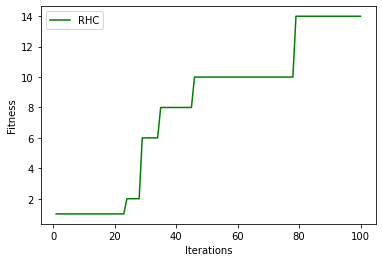

In [39]:
restart = 95
fitness = mlrose_hiive.FourPeaks()
four_peaks_object = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
rhc(four_peaks_object, max_attempts, max_iters, restart)

Running Simulated Annealing Experiment
Time (s): 0.005606174468994141



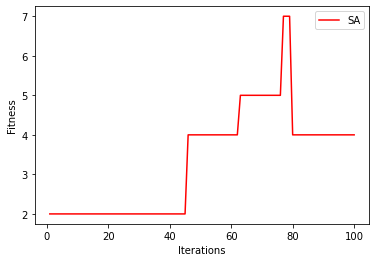

In [40]:
schedule = mlrose_hiive.GeomDecay(init_temp = 1, decay=0.1, min_temp=1)
simulated_annealing(four_peaks_object, max_attempts, max_iters, schedule)

Running Genetic Algorithm Experiment
Time (s): 0.8920269012451172



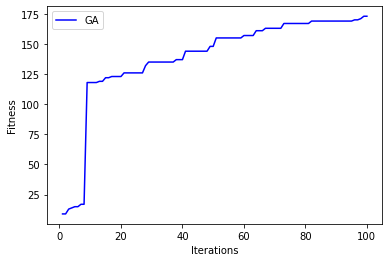

In [44]:
pop_size = 200
mutation_prob = 0.2
ga(four_peaks_object, max_attempts, max_iters, pop_size, mutation_prob=mutation_prob)

Running MIMIC Algorithm Experiment
Time (s): 235.00099086761475



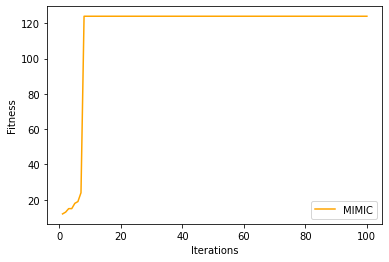

In [65]:
keep_pct = 0.25
mimic(four_peaks_object, max_attempts, max_iters, keep_pct)

### OneMax

In [52]:
fitness = mlrose_hiive.OneMax()

Running Random Hill Climb Experiment
Time (s): 0.16214489936828613



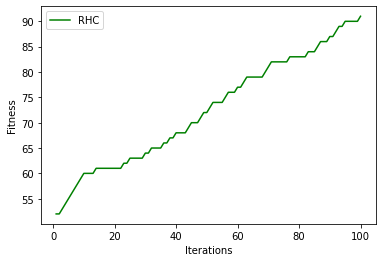

In [53]:
one_max_object = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
rhc(one_max_object, max_attempts, max_iters, restart)

Running Simulated Annealing Experiment
Time (s): 0.004643917083740234



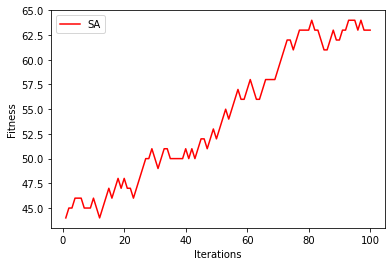

In [54]:
simulated_annealing(one_max_object, max_attempts, max_iters, schedule)

Running Genetic Algorithm Experiment
Time (s): 0.7771551609039307



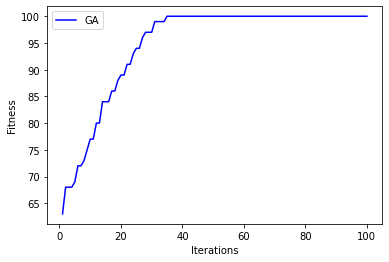

In [55]:
ga(one_max_object, max_attempts, max_iters, pop_size, mutation_prob=mutation_prob)

Running MIMIC Algorithm Experiment
Time (s): 231.83000588417053



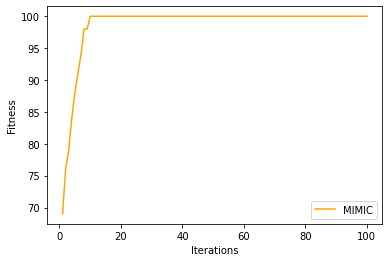

In [66]:
mimic(one_max_object, max_attempts, max_iters, keep_pct)

### FlipFlop

In [57]:
fitness = mlrose_hiive.FlipFlop()

Running Random Hill Climb Experiment
Time (s): 2.12524676322937



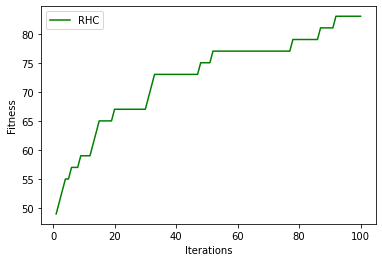

In [58]:
flip_flop_object = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
rhc(flip_flop_object, max_attempts, max_iters, restart)

Running Simulated Annealing Experiment
Time (s): 0.038758039474487305



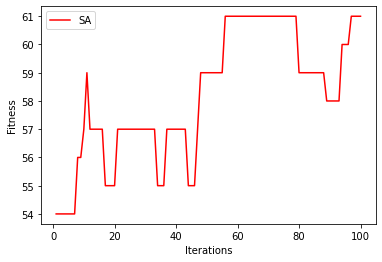

In [59]:
simulated_annealing(flip_flop_object, max_attempts, max_iters, schedule)

Running Genetic Algorithm Experiment
Time (s): 4.478827953338623



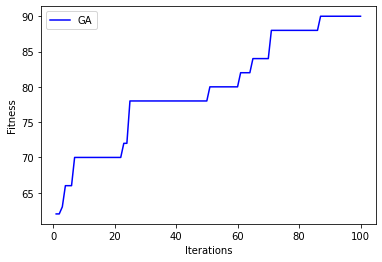

In [60]:
ga(flip_flop_object, max_attempts, max_iters, pop_size, mutation_prob=mutation_prob)

Running MIMIC Algorithm Experiment
Time (s): 238.91711616516113



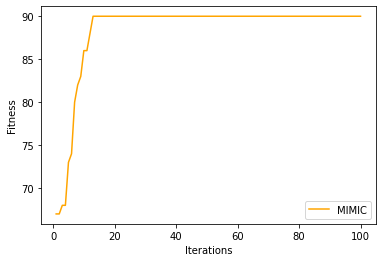

In [67]:
mimic(flip_flop_object, max_attempts, max_iters, keep_pct)

### Evaluations

In [64]:
# Random Hill Climbing curve plot
plt.plot(iterations, rhc_fitness_curve[:, 1], label='RHC', color='green')
plt.show()

NameError: name 'rhc_fitness_curve' is not defined

In [62]:
# Simulated Annealing curve plot
plt.plot(iterations, sa_fitness_curve[:, 1], label='SA', color='red')

NameError: name 'sa_fitness_curve' is not defined

In [ ]:
# Genetic Algorithms curve plot
plt.plot(iterations, ga_fitness_curve[:, 1], label='GA', color='blue')

### Retrain

In [ ]:
restarts_list = [80, 90, 100, 110, 120]
train_random_hill_climbing(fitness_functions_list, restarts_list)